In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns             #data visualization
import matplotlib.pyplot as plt   # high-level interface for_creating attractive and_informative statistical graphics

In [ ]:
data = pd.read_csv('/content/loan_prediction.csv')

In [ ]:
# Loan_ID : Unique Loan ID  # Gender : Male/ Female # Married : Applicant married (Y/N) # Dependents : Number of dependents
# Education : Applicant Education (Graduate/ Under Graduate)  # Self_Employed : Self employed (Y/N)  # ApplicantIncome : Applicant income
# CoapplicantIncome : Coapplicant income  # LoanAmount : Loan amount in thousands of dollars # Loan_Amount_Term : Term of loan in months
# Credit_History : Credit history meets guidelines yes or no # Property_Area : Urban/ Semi Urban/ Rural
# Loan_Status : Loan approved (Y/N) this is the target variable

### 1. Display Top 5 Rows of The Dataset

In [ ]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### 2. Check Last 5 Rows of The Dataset

In [ ]:
data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


### 3. Find Shape of Our Dataset (Number of Rows And Number of Columns)

In [ ]:
data.shape

(614, 13)

### 4. Get Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
data['Loan_Status'].value_counts()

,count
Loan_Status,
Y,422
N,192


In [ ]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
data['Loan_Status'].value_counts(normalize=True)  #normalize is_used to scale the data in_the rangeof zero to one

,proportion
Loan_Status,
Y,0.687296
N,0.312704


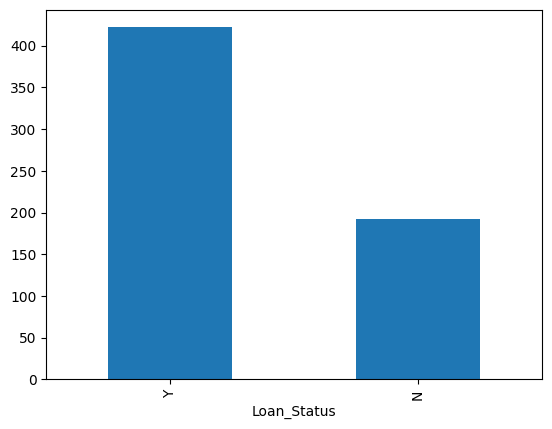

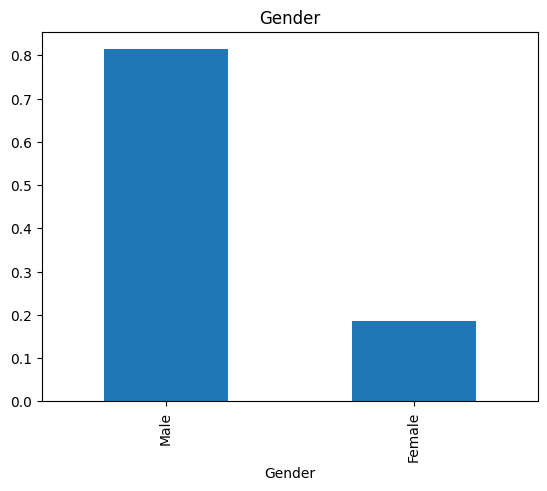

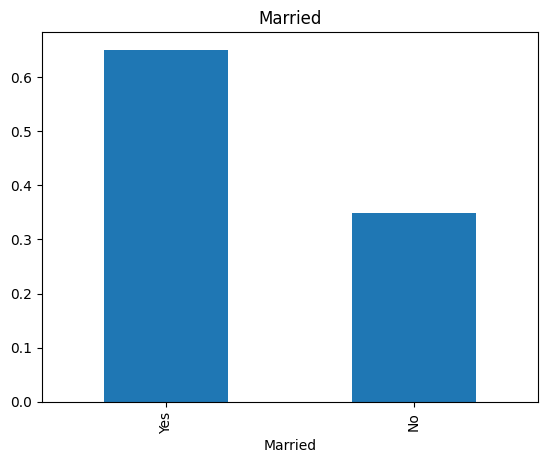

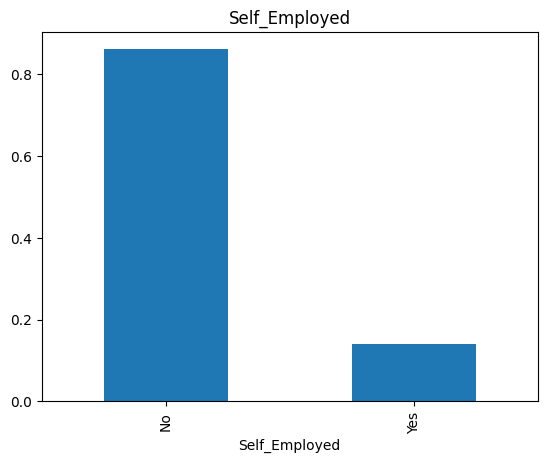

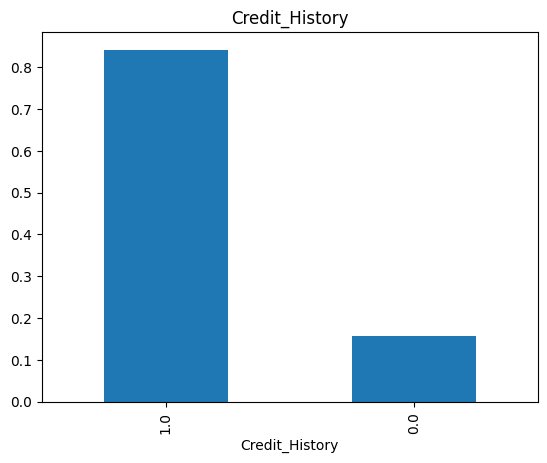

In [ ]:
data['Loan_Status'].value_counts().plot.bar()
plt.show()
data['Gender'].value_counts(normalize=True).plot.bar(title='Gender')
plt.show()
data['Married'].value_counts(normalize=True).plot.bar(title='Married')
plt.show()
data['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')
plt.show()
data['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')
plt.show()

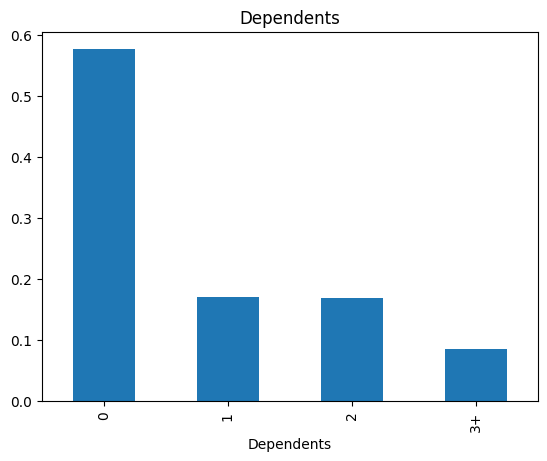

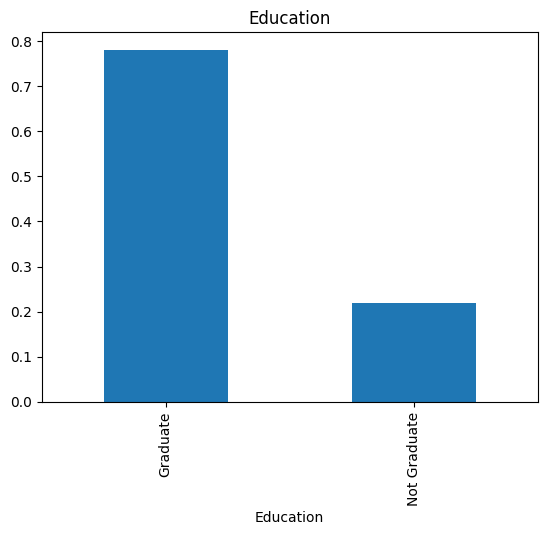

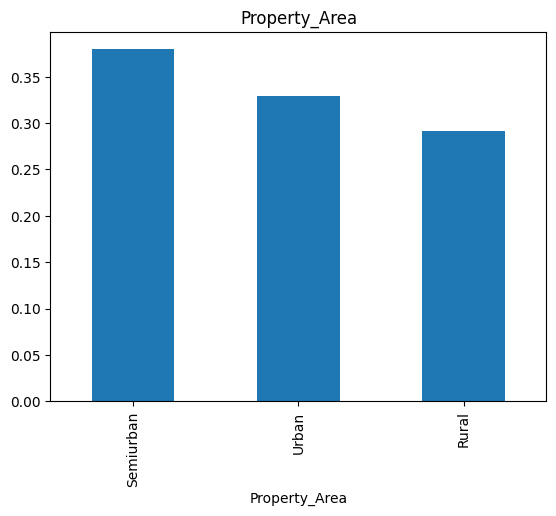

In [ ]:
data['Dependents'].value_counts(normalize=True).plot.bar( title='Dependents')
plt.show()
data['Education'].value_counts(normalize=True).plot.bar(title='Education')
plt.show()
data['Property_Area'].value_counts(normalize=True).plot.bar(title='Property_Area')
plt.show()

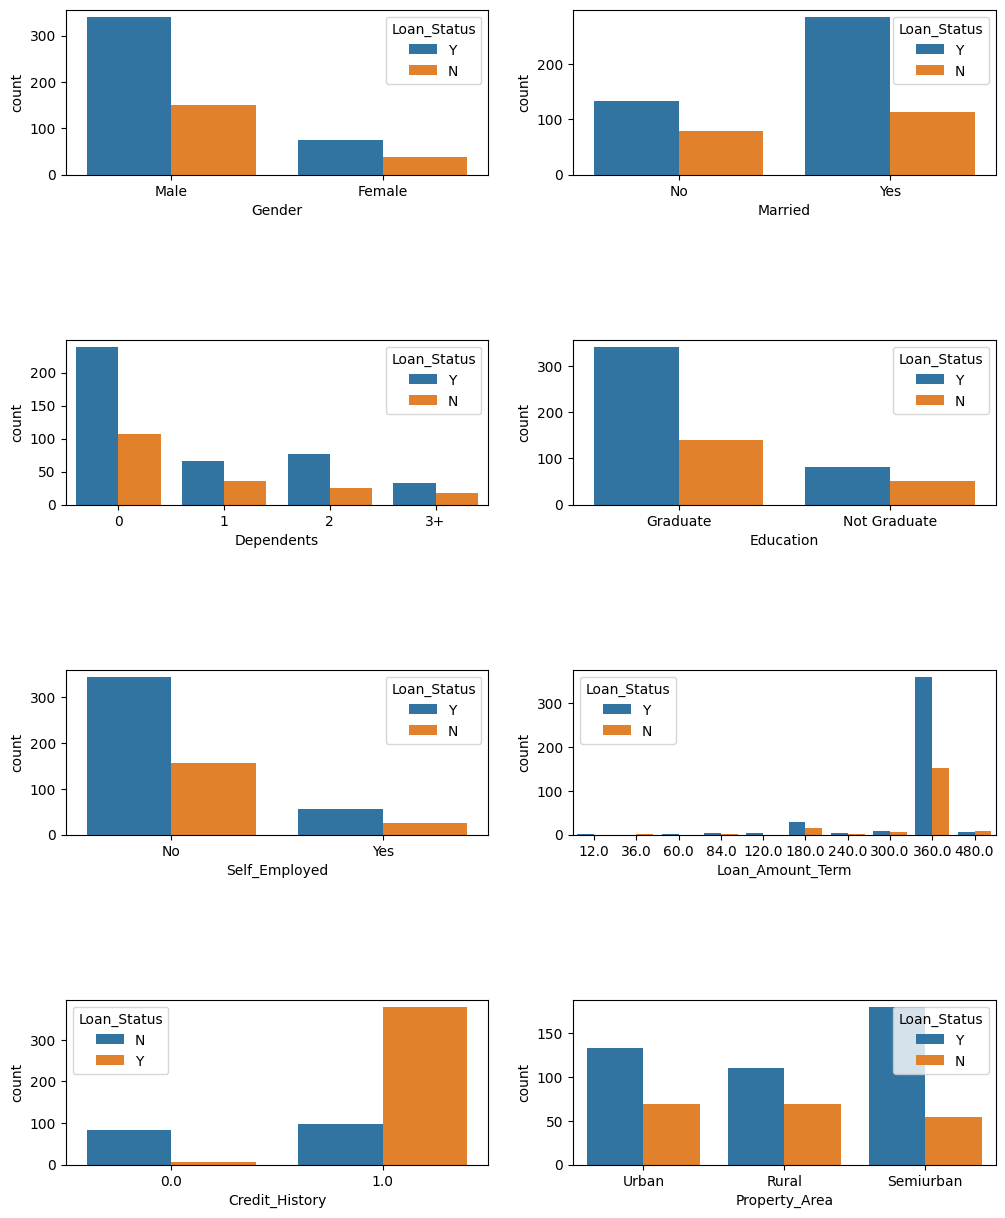

In [ ]:
categorical_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
                        'Loan_Amount_Term','Credit_History','Property_Area']
numerical_features = ['ApplicantIncome','CoapplicantIncome','LoanAmount']

#categorical features
fig,axes = plt.subplots(4,2,figsize=(12,15))
for idx,cat_col in enumerate(categorical_features):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=data,hue='Loan_Status',ax=axes[row,col])

plt.subplots_adjust(hspace=1)

### 5. Check Null Values In The Dataset

In [ ]:
data.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
data.isnull().sum()*100 / len(data)

,0
Loan_ID,0.000000
Gender,2.117264
Married,0.488599
Dependents,2.442997
Education,0.000000
Self_Employed,5.211726
ApplicantIncome,0.000000
CoapplicantIncome,0.000000
LoanAmount,3.583062
Loan_Amount_Term,2.280130


### 6. Handling The missing Values

In [ ]:
data = data.drop('Loan_ID',axis=1)

In [ ]:
data.head(1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y


In [ ]:
columns = ['Gender','Dependents','LoanAmount','Loan_Amount_Term']

In [ ]:
data = data.dropna(subset=columns)

In [ ]:
data.isnull().sum()*100 / len(data)

,0
Gender,0.000000
Married,0.000000
Dependents,0.000000
Education,0.000000
Self_Employed,5.424955
ApplicantIncome,0.000000
CoapplicantIncome,0.000000
LoanAmount,0.000000
Loan_Amount_Term,0.000000
Credit_History,8.679928


In [ ]:
data['Self_Employed'].mode()[0]

'No'

In [ ]:
data['Self_Employed'] =data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

In [ ]:
data.isnull().sum()*100 / len(data)

,0
Gender,0.000000
Married,0.000000
Dependents,0.000000
Education,0.000000
Self_Employed,0.000000
ApplicantIncome,0.000000
CoapplicantIncome,0.000000
LoanAmount,0.000000
Loan_Amount_Term,0.000000
Credit_History,8.679928


In [ ]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
data['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
data['Credit_History'].mode()[0]

1.0

In [ ]:
data['Credit_History'] =data['Credit_History'].fillna(data['Credit_History'].mode()[0])

In [ ]:
data.isnull().sum()*100 / len(data)

,0
Gender,0.0
Married,0.0
Dependents,0.0
Education,0.0
Self_Employed,0.0
ApplicantIncome,0.0
CoapplicantIncome,0.0
LoanAmount,0.0
Loan_Amount_Term,0.0
Credit_History,0.0


### 7. Handling Categorical Columns

In [ ]:
data.sample(5)   #randomly selects specified rows in_data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
485,Male,Yes,1,Not Graduate,No,1958,2436.0,131.0,360.0,1.0,Rural,Y
553,Male,Yes,0,Not Graduate,No,2454,2333.0,181.0,360.0,0.0,Urban,N
544,Female,Yes,0,Not Graduate,No,3017,663.0,102.0,360.0,1.0,Semiurban,Y
385,Male,No,1,Graduate,No,3667,0.0,113.0,180.0,1.0,Urban,Y
320,Male,Yes,0,Graduate,No,2400,2167.0,115.0,360.0,1.0,Semiurban,Y


In [ ]:
data['Dependents'] =data['Dependents'].replace(to_replace="3+",value='4')

In [ ]:
data['Dependents'].unique()  # distinct values

array(['1', '0', '2', '4'], dtype=object)

In [ ]:
data['Loan_Status'].unique()

array(['N', 'Y'], dtype=object)

In [ ]:
data['Gender'] = data['Gender'].map({'Male':1,'Female':0}).astype('int')
data['Married'] = data['Married'].map({'Yes':1,'No':0}).astype('int')
data['Education'] = data['Education'].map({'Graduate':1,'Not Graduate':0}).astype('int')
data['Self_Employed'] = data['Self_Employed'].map({'Yes':1,'No':0}).astype('int')
data['Property_Area'] = data['Property_Area'].map({'Rural':0,'Semiurban':2,'Urban':1}).astype('int')
data['Loan_Status'] = data['Loan_Status'].map({'Y':1,'N':0}).astype('int')


In [ ]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,1


### 8. Store Feature Matrix In X And Response (Target) In Vector y

In [ ]:
X = data.drop('Loan_Status',axis=1) #drop a column

In [ ]:
y = data['Loan_Status']

In [ ]:
y

,Loan_Status
1,0
2,1
3,1
4,1
5,1
...,...
609,1
610,1
611,1
612,1


### 9. Feature Scaling used to standardize the range of independent variables

In [ ]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,1


In [ ]:
cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']

In [ ]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()                 # standardize features by removing the means and_scaling to unit variance
X[cols]=st.fit_transform(X[cols])

In [ ]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,1,1,0,-0.128694,-0.049699,-0.214368,0.279961,1.0,0
2,1,1,0,1,1,-0.394296,-0.545638,-0.952675,0.279961,1.0,1
3,1,1,0,0,0,-0.464262,0.229842,-0.309634,0.279961,1.0,1
4,1,0,0,1,0,0.109057,-0.545638,-0.059562,0.279961,1.0,1
5,1,1,2,1,1,0.011239,0.834309,1.440866,0.279961,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,-0.411075,-0.545638,-0.893134,0.279961,1.0,0
610,1,1,4,1,0,-0.208727,-0.545638,-1.262287,-2.468292,1.0,0
611,1,1,1,1,0,0.456706,-0.466709,1.274152,0.279961,1.0,1
612,1,1,2,1,0,0.374659,-0.545638,0.488213,0.279961,1.0,1


### 10. Splitting The Dataset Into The Training Set And Test Set & Applying K-Fold Cross Validation - evaluate performance and generalization ability and divides the data set into multiple subsets

In [ ]:
from sklearn.model_selection import train_test_split   #splitting data,performing cross-validation and tuning hyperparameter
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score  # the ratio of correct predictions to total prediction
import numpy as np

In [ ]:
model_df={}
def model_val(model,X,y):
    X_train,X_test,y_train,y_test=train_test_split(X,y,
                                                   test_size=0.20,
                                                   random_state=42)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test) #make prediction on new data after a model has been trained
    print(f"{model} accuracy is {accuracy_score(y_test,y_pred)}")

    score = cross_val_score(model,X,y,cv=5)  # it assess how well the modelgeneralizes to an independent dataset
    print(f"{model} Avg cross val score is {np.mean(score)}")
    model_df[model]=round(np.mean(score)*100,2)


### 11. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model_val(model,X,y)

LogisticRegression() accuracy is 0.8018018018018018
LogisticRegression() Avg cross val score is 0.8047829647829647


### 12. SVC

In [ ]:
from sklearn import svm
model = svm.SVC()
model_val(model,X,y)

SVC() accuracy is 0.7927927927927928
SVC() Avg cross val score is 0.7938902538902539


### 13. Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model_val(model,X,y)

DecisionTreeClassifier() accuracy is 0.7387387387387387
DecisionTreeClassifier() Avg cross val score is 0.7125634725634726


### 14. Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model =RandomForestClassifier()
model_val(model,X,y)

RandomForestClassifier() accuracy is 0.7747747747747747
RandomForestClassifier() Avg cross val score is 0.7866994266994267


### 16. Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

### Logistic Regression

In [ ]:
log_reg_grid={"C":np.logspace(-4,4,20),
             "solver":['liblinear']}

In [ ]:
rs_log_reg=RandomizedSearchCV(LogisticRegression(),
                   param_distributions=log_reg_grid,
                  n_iter=20,cv=5,verbose=True)

In [ ]:
rs_log_reg.fit(X,y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [ ]:
rs_log_reg.best_score_

0.8047829647829647

In [ ]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

### SVC

In [ ]:
svc_grid = {'C':[0.25,0.50,0.75,1],"kernel":["poly"]}

In [ ]:
rs_svc=RandomizedSearchCV(svm.SVC(),
                  param_distributions=svc_grid,
                   cv=5,
                   n_iter=20,
                  verbose=True,error_score='raise')

In [ ]:
rs_svc.fit(X,y)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


RandomizedSearchCV(cv=5, error_score='raise', estimator=SVC(), n_iter=20,
                   param_distributions={'C': [0.25, 0.5, 0.75, 1],
                                        'kernel': ['poly']},
                   verbose=True)

In [ ]:
rs_svc.best_score_


0.7613759213759212

In [ ]:
rs_svc.best_params_

{'kernel': 'poly', 'C': 1}

###  Random Forest Classifier

In [ ]:
a=RandomForestClassifier()
# RandomForestClassifier().fit(X,y)

In [ ]:
rf_grid={'n_estimators':np.arange(10,1000,10),
  'max_features':['auto','sqrt'],
 'max_depth':[None,3,5,10,20,30],
 'min_samples_split':[2,5,20,50,100],
 'min_samples_leaf':[1,2,5,10]
 }

In [ ]:
rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                  param_distributions=rf_grid,
                   cv=5,
                   n_iter=20,
                  verbose=True)

In [ ]:
rs_rf.fit(X,y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 20, 50,
                                                              100],
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260,
       270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390,
       400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520,
       530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650,
       660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780,
       790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900, 910,
       920, 930, 940, 950, 960, 970, 980, 990])},
                   verbose=True)

In [ ]:
rs_rf.best_score_

0.8066011466011467

In [ ]:
rs_rf.best_params_

{'n_estimators': 930,
 'min_samples_split': 5,
 'min_samples_leaf': 10,
 'max_features': 'sqrt',
 'max_depth': None}

In [ ]:
model_df

{LogisticRegression(): 80.48,
 SVC(): 79.39,
 DecisionTreeClassifier(): 71.26,
 RandomForestClassifier(): 78.67}

In [ ]:
print("Logistic Regression Hyperparameter tuning Acuracy:",round(rs_log_reg.best_score_,2)*100)
print("Support Vector Machine Hyperparameter tuning Acuracy:",round(rs_svc.best_score_,2)*100)
print("Random Forest Hyperparameter tuning Acuracy:",round(rs_rf.best_score_,2)*100)

Logistic Regression Hyperparameter tuning Acuracy: 80.0
Support Vector Machine Hyperparameter tuning Acuracy: 76.0
Random Forest Hyperparameter tuning Acuracy: 81.0


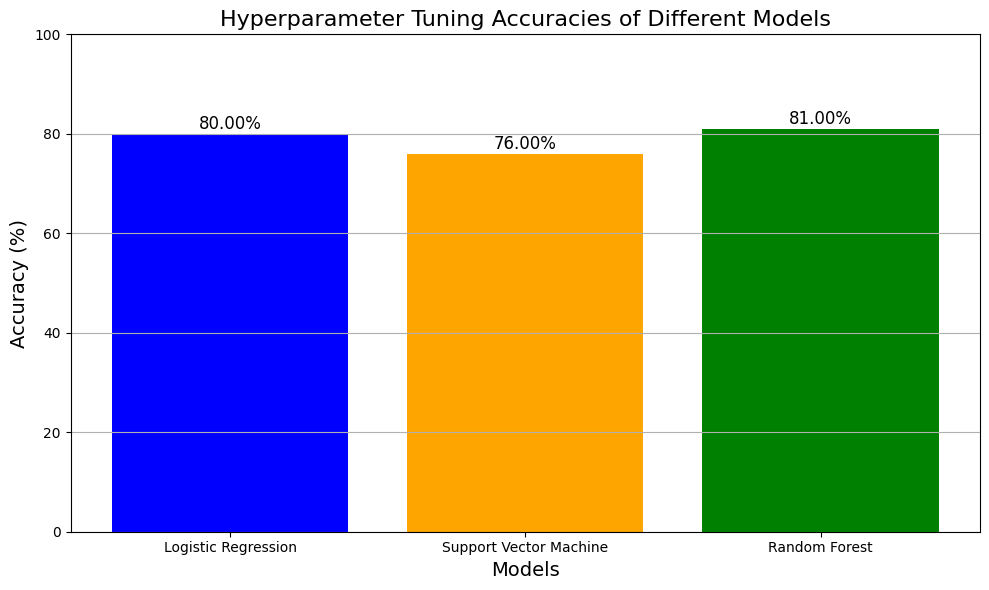

In [ ]:
import matplotlib.pyplot as plt

# Sample accuracies (replace these with your actual results)
log_reg_accuracy = round(rs_log_reg.best_score_, 2) * 100
svc_accuracy = round(rs_svc.best_score_, 2) * 100
rf_accuracy = round(rs_rf.best_score_, 2) * 100

# Data for plotting
models = ['Logistic Regression', 'Support Vector Machine', 'Random Forest']
accuracies = [log_reg_accuracy, svc_accuracy, rf_accuracy]

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'orange', 'green'])
plt.xlabel('Models', fontsize=14)
plt.ylabel('Accuracy (%)', fontsize=14)
plt.title('Hyperparameter Tuning Accuracies of Different Models', fontsize=16)
plt.ylim(0, 100)  # Set y-axis limit to 100%
plt.grid(axis='y')

# Show the accuracy values on the bars
for i, v in enumerate(accuracies):
    plt.text(i, v + 1, f"{v:.2f}%", ha='center', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


### 17. Save The Model

In [ ]:
X = data.drop('Loan_Status',axis=1)
y = data['Loan_Status']

In [ ]:
rf = RandomForestClassifier(n_estimators=270,
 min_samples_split=5,
 min_samples_leaf=5,
 max_features='sqrt',
 max_depth=5)

In [ ]:
rf.fit(X,y) #fit function adjust the model parameters to learn patterns from_data

RandomForestClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=5,
                       n_estimators=270)

In [ ]:
import joblib

In [ ]:
joblib.dump(rf,'loan_status_predict')

['loan_status_predict']

In [ ]:
model = joblib.load('loan_status_predict')

In [ ]:
import pandas as pd

def calculate_credit_history():
    print("\nTo calculate an approximate credit history, please answer the following questions:")
    print("--------------------------------------------------")

    # Ask relevant questions
    defaulted_loans = input("1. Have you missed any loan payments in the past? (yes/no): ").strip().lower()
    on_time_payments = input("2. Do you consistently make on-time payments? (yes/no): ").strip().lower()
    credit_card_usage = input("3. Do you keep your credit card usage below 30% of the limit? (yes/no): ").strip().lower()
    loan_count = int(input("4. How many loans (personal, home, vehicle, etc.) do you currently have? (Enter a number): ").strip())
    account_age = int(input("5. How many years have you had a credit account? (Enter a number): ").strip())

    # Initialize credit score points
    credit_score = 0

    # Assign points based on user answers
    credit_score += 30 if defaulted_loans == "no" else -20
    credit_score += 20 if on_time_payments == "yes" else -10
    credit_score += 10 if credit_card_usage == "yes" else -10
    credit_score += 15 if loan_count <= 2 else 5
    credit_score += 25 if account_age >= 2 else 10

    # Determine credit history status based on the score
    credit_history = 1 if credit_score >= 50 else 0
    print(f"\nCalculated credit score: {credit_score} -> Credit History: {credit_history} (1=Good, 0=Poor)\n")

    return credit_history

def get_user_input():
    print("--------------------------------------------------\n")
    print("Please provide the following information:")

    # Collect user inputs with better readability
    gender = input("1. Enter your gender (male/female): ").lower()
    married = input("2. Are you married? (yes/no): ").lower()
    dependents = input("3. How many dependents do you have? (0, 1, 2, or 3+): ")
    education = input("4. Are you a graduate? (yes/no): ").lower()
    self_employed = input("5. Are you self-employed? (yes/no): ").lower()
    applicant_income = input("6. What is your annual income (in INR)? ").strip()
    coapplicant_income = input("7. What is your co-applicant's annual income (in INR)? ").strip()
    loan_amount = input("8. How much loan amount are you applying for (in INR)? ").strip()
    loan_amount_term = input("9. Loan Amount Term (in days): ").strip()  # Change to days
    property_area = input("10. Where is the property located? (rural/semiurban/urban): ").lower()

    # Convert categorical inputs to numerical values
    gender_map = {'female': 0, 'male': 1}
    married_map = {'no': 0, 'yes': 1}
    education_map = {'no': 0, 'yes': 1}
    self_employed_map = {'no': 0, 'yes': 1}
    property_area_map = {'rural': 0, 'semiurban': 1, 'urban': 2}

    # Apply the mapping
    gender = gender_map.get(gender, 0)
    married = married_map.get(married, 0)
    education = education_map.get(education, 0)
    self_employed = self_employed_map.get(self_employed, 0)
    property_area = property_area_map.get(property_area, 0)

    # Convert dependents to integer and handle default if necessary
    dependents = int(dependents) if dependents.isdigit() else 3  # Default to 3 if not digit

    # Convert numeric inputs to appropriate types
    try:
        applicant_income = float(applicant_income) / 100
        coapplicant_income = float(coapplicant_income) / 100
        loan_amount = float(loan_amount) / 1000
        loan_amount_term = int(loan_amount_term)
    except ValueError:
        raise ValueError("Invalid input format. Please ensure all numeric inputs are correct.")

    # Calculate credit history score based on user responses
    credit_history = calculate_credit_history()

    # Create DataFrame with the provided data
    df = pd.DataFrame({
        'Gender': [gender],
        'Married': [married],
        'Dependents': [dependents],
        'Education': [education],
        'Self_Employed': [self_employed],
        'ApplicantIncome': [applicant_income],
        'CoapplicantIncome': [coapplicant_income],
        'LoanAmount': [loan_amount],
        'Loan_Amount_Term': [loan_amount_term],
        'Credit_History': [credit_history],
        'Property_Area': [property_area]
    })

    return df

# Collect user input and create DataFrame
user_df = get_user_input()
print("\nYour Data (User DataFrame):")
print(user_df)


--------------------------------------------------

Please provide the following information:
1. Enter your gender (male/female): male
2. Are you married? (yes/no): yes
3. How many dependents do you have? (0, 1, 2, or 3+): 2
4. Are you a graduate? (yes/no): yes
5. Are you self-employed? (yes/no): yes
6. What is your annual income (in INR)? 500000
7. What is your co-applicant's annual income (in INR)? 400000
8. How much loan amount are you applying for (in INR)? 50000
9. Loan Amount Term (in days): 120
10. Where is the property located? (rural/semiurban/urban): semirural

To calculate an approximate credit history, please answer the following questions:
--------------------------------------------------
1. Have you missed any loan payments in the past? (yes/no): no
2. Do you consistently make on-time payments? (yes/no): yes
3. Do you keep your credit card usage below 30% of the limit? (yes/no): no
4. How many loans (personal, home, vehicle, etc.) do you currently have? (Enter a number):

In [ ]:
result = model.predict(user_df)

In [76]:
if result==1:
    print("Prediction : Loan Approved")
else:
    print("Prediction : Loan Not Approved")

Prediction : Loan Approved
